Regression - find relationship between variables

Least Square Method - draw a line through all plotted data points. Line positioned in a way that it minimizes the distance to all of the data points. The distance called **residuals** or **errors**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
full_health_data = pd.read_csv('data.csv', header=0, sep=',')

x = full_health_data['Average_Pulse']
y = full_health_data['Calorie_Burnage']
print(full_health_data)
print('x:', x)
print('y:', y)

     Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  Hours_Work  \
0          60            110        130              409         0.0   
1          60            117        145              479         0.0   
2          60            103        135              340         8.0   
3          45            109        175              282         8.0   
4          45            117        148              406         0.0   
..        ...            ...        ...              ...         ...   
158        60            105        140              290         7.0   
159        60            110        145              300         7.0   
160        60            115        145              310         8.0   
161        75            120        150              320         0.0   
162        75            125        150              330         8.0   

     Hours_Sleep  
0            8.0  
1            8.0  
2            7.5  
3            8.0  
4            6.5  
..           ...  
15

In [3]:
stats.linregress(x, y)

LinregressResult(slope=0.3295634736556584, intercept=346.8662267857687, rvalue=0.017576257945091014, pvalue=0.8237776479944344, stderr=1.477517466577579, intercept_stderr=160.61521830559641)

In [4]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [6]:
def predictions(x):
    return slope * x + intercept

mymodel = list(map(predictions, x))
mymodel

[383.1182088878911,
 385.4251532034807,
 380.81126457230147,
 382.7886454142354,
 385.4251532034807,
 380.48170109864583,
 383.1182088878911,
 381.14082804595716,
 382.7886454142354,
 379.1634472040232,
 380.81126457230147,
 379.8225741513345,
 381.79995499326844,
 381.14082804595716,
 379.1634472040232,
 379.1634472040232,
 379.8225741513345,
 376.5269394147779,
 380.81126457230147,
 378.8338837303675,
 382.4590819405798,
 379.8225741513345,
 389.70947836100424,
 381.4703915196128,
 380.48170109864583,
 379.8225741513345,
 377.18606636208926,
 380.81126457230147,
 379.8225741513345,
 380.48170109864583,
 377.18606636208926,
 380.1521376249902,
 377.5156298357449,
 382.12951846692414,
 384.43646278251373,
 379.8225741513345,
 379.8225741513345,
 381.14082804595716,
 379.1634472040232,
 379.8225741513345,
 383.44777236154675,
 383.44777236154675,
 379.49301067767885,
 382.7886454142354,
 383.44777236154675,
 382.4590819405798,
 383.44777236154675,
 382.12951846692414,
 387.4025340454146

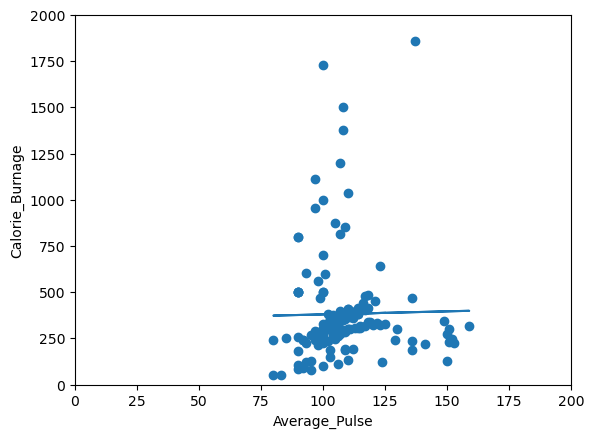

In [9]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=200)
plt.xlabel('Average_Pulse')
plt.ylabel('Calorie_Burnage')
plt.show()

# Regression Table - summarize output from lin regression

In [17]:
import pandas as pd
import statsmodels.formula.api as smf

model = smf.ols('Calorie_Burnage ~ Average_Pulse', data=full_health_data)
# Ordinary Least Squares method, formula = Calorie_Burage ~ Average_Pulse, means tryna predict 'Calorie_Burnage' based on 'Average_Pulse'
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calorie_Burnage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04975
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.824
Time:                        17:15:26   Log-Likelihood:                -1145.8
No. Observations:                 163   AIC:                             2296.
Df Residuals:                     161   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       346.8662    160.615      2.160      0.032      29.682     664.050
Average_Pulse     0.3296      1.478      0.223      0.824      -2.588       3.247
==============================================================================
Omnibus:                      124.542   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.541
Skew:                           2.927   Prob(JB):                    1.58e-204
Kurtosis:                      13.195   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coef: can find fomula from those coeff in regression table:
`Calorie_Burnage = 0.3296 * Average_Pulse + 346.87`

In [18]:
def predict_calorie_burnage(Average_Pulse):
    return (0.3296 * Average_Pulse + 346.8662)

# P-value - conclude if there is relationship between dependent and independent

Assume , no relationship(true value of coefficient = 0). 
* low P-value (< 0,05) coefficient is likely not 0: Relationship
* high P-value(>0,05) cannot conclude explanatory variable affects dependent variable.(No relationship)

______5%  P   5%___________(P > 0.05) --> нулевая гипотеза(0)   (P < 0.05) --> альтернативная гипотеза(!0)

If reject null hypothesis, conclude that it exists relationship .

p-value of 5%: 5% of times we will falsely reject the null hypothesis. We accept that 5% of times, we might falsely concluded relationship

If p-value is lower than 0.05, we can reject null hypothesis and conclude, it exists relationship between variables

Here, above, P-value of `Average_Pulse(P>|t|) = 0.824` , 0.05 < 0.824 , we cant conclude relationship between variables. 
0.824 p-value means there is 82.4% chance that true coefficient of `Average_Pulse` is zero.

Intercept in regression: intercept used to adjust regression function's ability to pre